<a href="https://colab.research.google.com/github/MaxZx3000/Forest-Fire/blob/main/Final_Project_Forest_Fire_Classifier_(Anthony_Kevin_Oktavius).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Forest Fire Classifier

Dibuat oleh: Anthony Kevin Oktavius

Library Import

In [26]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTENC

## Data Loading

Mengunduh dataset forestfire.csv dari UCI Machine Learning Repository

In [2]:
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

forest_fire_df = pd.read_csv(dataset_url)
forest_fire_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Melihat info singkat pada dataset.

In [3]:
forest_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Melihat nilai statistika pada dataset forest fire.

In [4]:
forest_fire_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Melakukan listing field-field pada dataset forest fire.


In [5]:
x_field = "X"
y_field = "Y"
month_field = "month"
day_field = "day"
ffmc_field = "FFMC"
dmc_field = "DMC"
dc_field = "DC"
isi_field = "ISI"
temp_field = "temp"
rh_field = "RH"
wind_field = "wind"
rain_field = "rain"
area_field = "area"

Mendefinisikan field numerikal dan kategorikal pada dataset forest fire.

In [6]:
categorical_variables = [x_field, y_field, month_field, day_field]
numerical_variables = [ffmc_field, dmc_field, isi_field,
                       temp_field, rh_field, wind_field, rain_field, area_field]

Mendefinisikan field-field target dan features.

In [41]:
features = list(forest_fire_df.columns)
features.remove(area_field)
features.remove(month_field)
features.remove(day_field)

target = area_field

## Data Visualization

### Single Variable

Bar Plot - Comparison

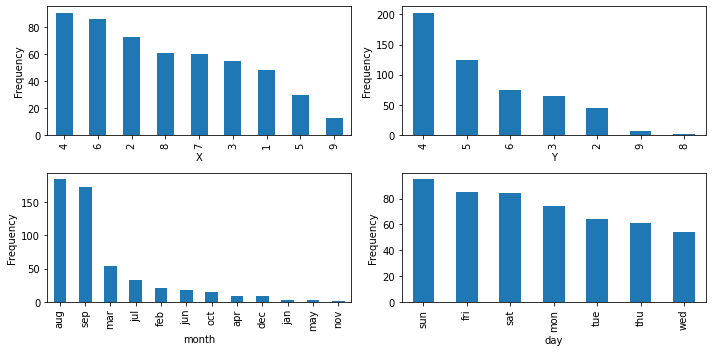

In [ ]:
bar_plot_fields = categorical_variables.copy()

figure, axes = plt.subplots(2, 2, figsize = (10, 5))
axes = axes.flatten()


for index, field in enumerate(bar_plot_fields):
  forest_fire_df[field].value_counts().plot(kind = 'bar', 
                                            ax = axes[index],
                                            xlabel = field,
                                            ylabel = "Frequency")

plt.tight_layout()
plt.show()

Dist plot - Distribution

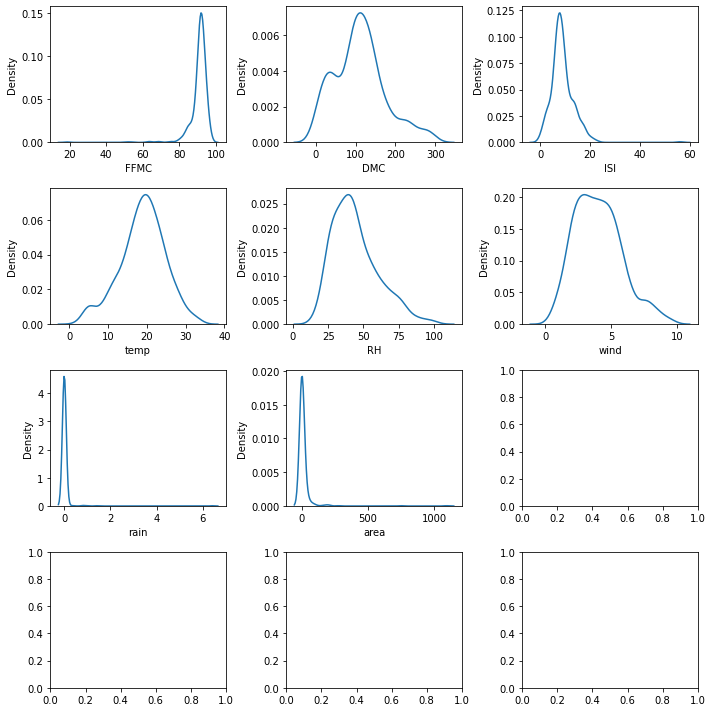

In [ ]:
dist_plot_fields = numerical_variables.copy()

figure, axes = plt.subplots(4, 3, figsize = (10, 10))
axes = axes.flatten()

for index, field in enumerate(dist_plot_fields):
  sns.kdeplot(forest_fire_df[field], ax = axes[index])

plt.tight_layout()
plt.show()

Box Plot - Distribution & Comparison & Outlier Detection

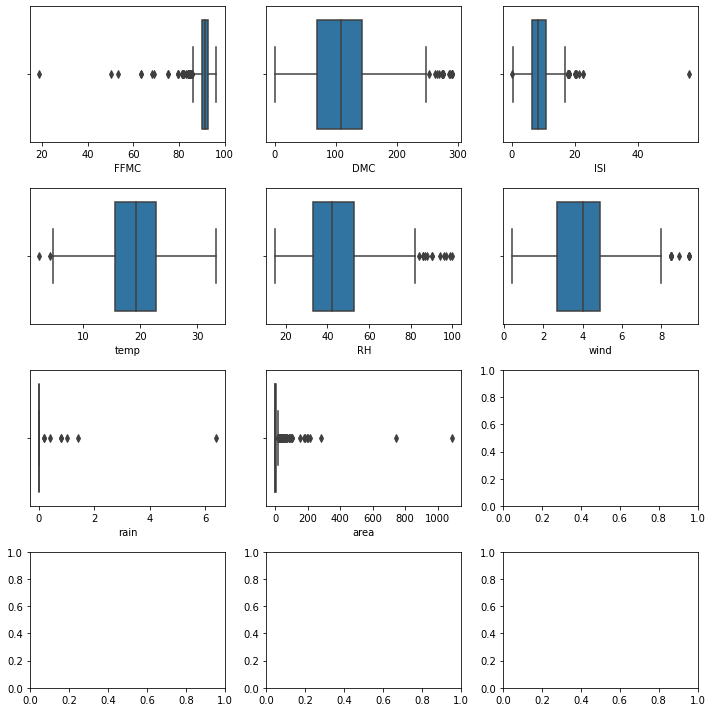

In [ ]:
box_plot_fields = numerical_variables.copy()

figure, axes = plt.subplots(4, 3, figsize = (10, 10))
axes = axes.flatten()

for index, field in enumerate(box_plot_fields):
  sns.boxplot(data = forest_fire_df, x = field, ax = axes[index])

plt.tight_layout()
plt.show()

### Two Variables

Multiple Bar Chart - Composition & Comparison

In [ ]:
def make_multiple_bar_plot(df, x1, x2, y, cmap, ax, statistic):
  target_field_two_categorical_df = df.groupby([x1, x2]).mean()[y]

  mean_target_field_two_categorical_df = target_field_two_categorical_df.unstack(
      level = 1
  )

  mean_target_field_two_categorical_df = mean_target_field_two_categorical_df.reset_index()


  mean_target_field_two_categorical_df = pd.melt(
      mean_target_field_two_categorical_df,
      id_vars = x1,
      var_name = x2,
      value_name = y
  )
  
  sns.barplot(x = x1,
              y = y,
              hue = x2,
              data = forest_fire_df,
              ax = ax,
              ci = None)

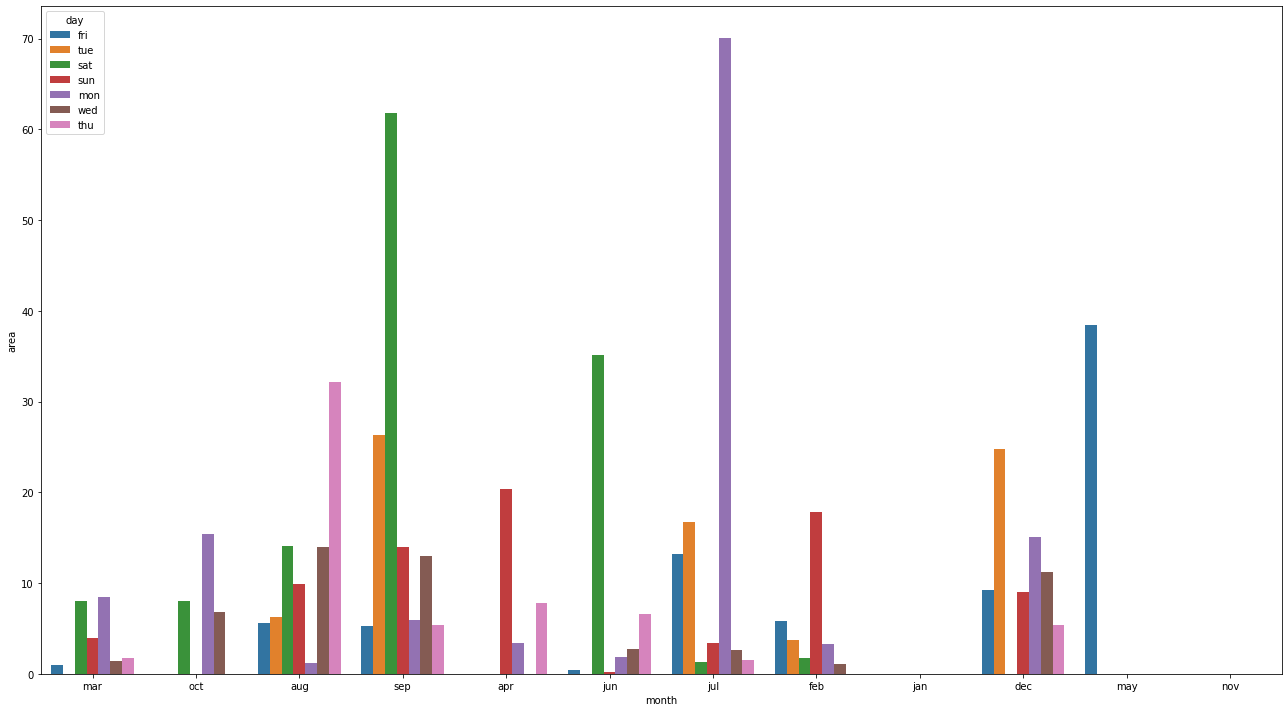

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

fig.set_figwidth(18)
fig.set_figheight(10)

multiple_bar_fields = categorical_variables.copy()
multiple_bar_fields.append(area_field)
    
make_multiple_bar_plot(forest_fire_df, 
                        x1 = month_field, 
                        x2 = day_field,
                        y = area_field, 
                        cmap = 'inferno',
                        ax = ax,
                        statistic = 'mean')
  
plt.tight_layout()
plt.show()

### Multiple Variables

Correlation Plot - Correlation

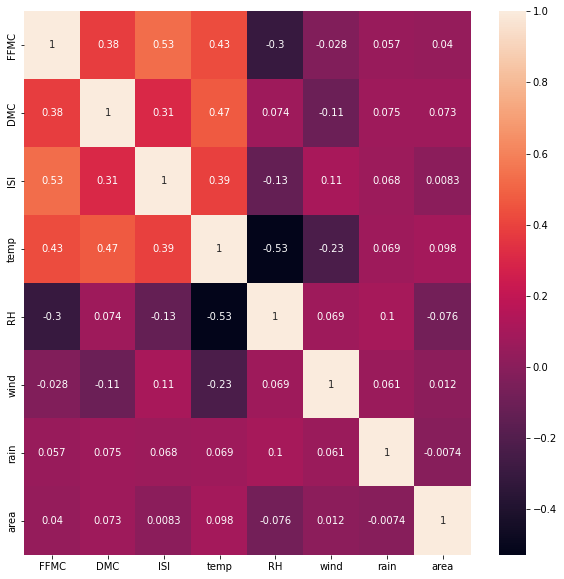

In [ ]:
corr_plot_fields = numerical_variables.copy()

plt.figure(figsize = (10, 10))
sns.heatmap(
    forest_fire_df[corr_plot_fields].corr(),
    annot = True,
)
plt.show()

Pairplot - Distribution & Comparison & Correlation

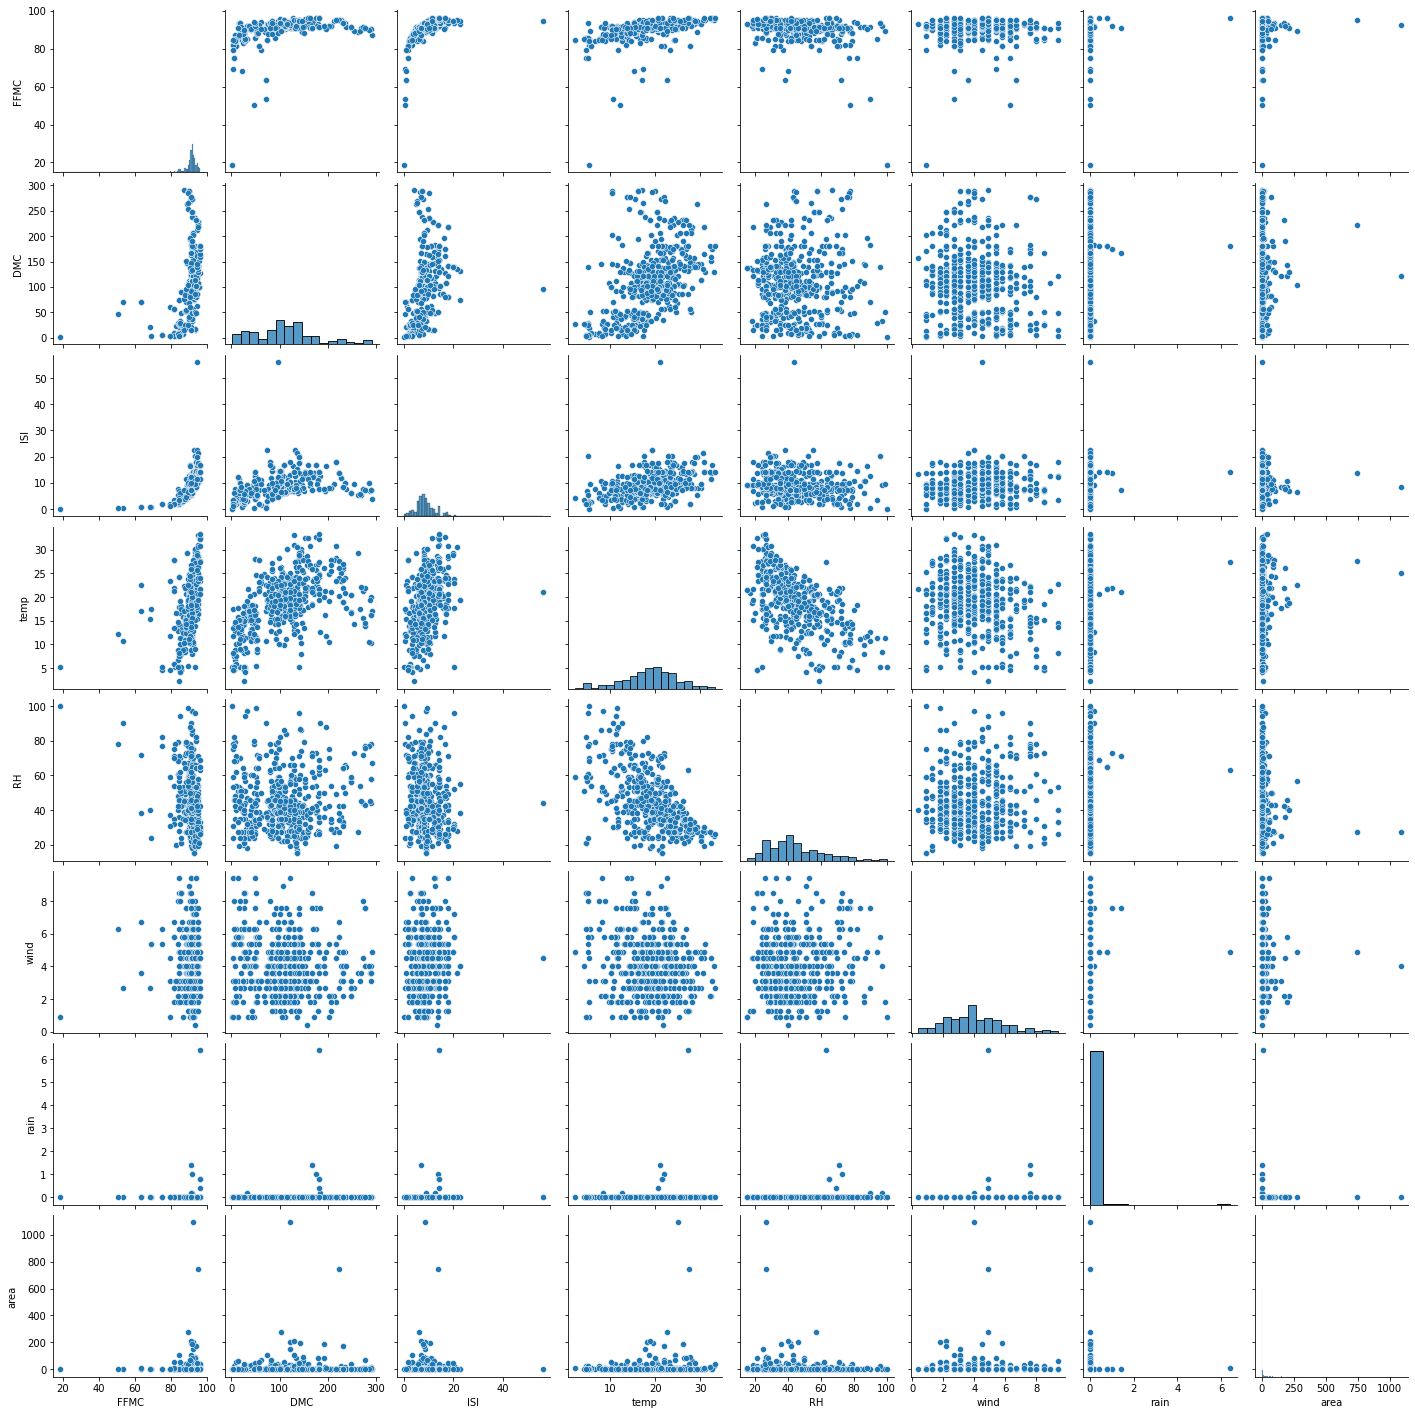

In [ ]:
pairplot_fields = numerical_variables.copy()

sns.pairplot(
    data = forest_fire_df[pairplot_fields],
)

## Data Preprocessing

### Hapus field Day and Month

In [38]:
uneccessary_fields = [day_field, month_field]
neccesary_forest_fire_df = forest_fire_df.drop(
    uneccessary_fields, 
    axis = 1
).copy()
neccesary_forest_fire_df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Area Feature Transformation dengan logarithm transformation.



In [46]:
log_transform_forest_fire_df = neccesary_forest_fire_df.copy()

log_transform_forest_fire_df[area_field] = np.log1p(log_transform_forest_fire_df[area_field])
print(log_transform_forest_fire_df[area_field].min())
print(log_transform_forest_fire_df[area_field].max())

0.0
6.995619625423205


Visualize Transformation

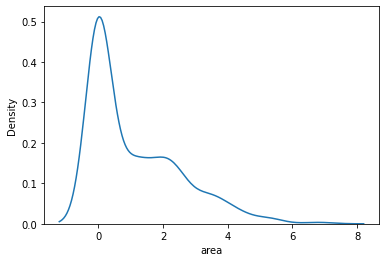

In [47]:
sns.kdeplot(log_transform_forest_fire_df[area_field])

### Feature Selection dengan Random Forest

In [48]:
random_forest = RandomForestRegressor(random_state = 100)
random_forest = random_forest.fit(
    log_transform_forest_fire_df[features],
    log_transform_forest_fire_df[target],
)

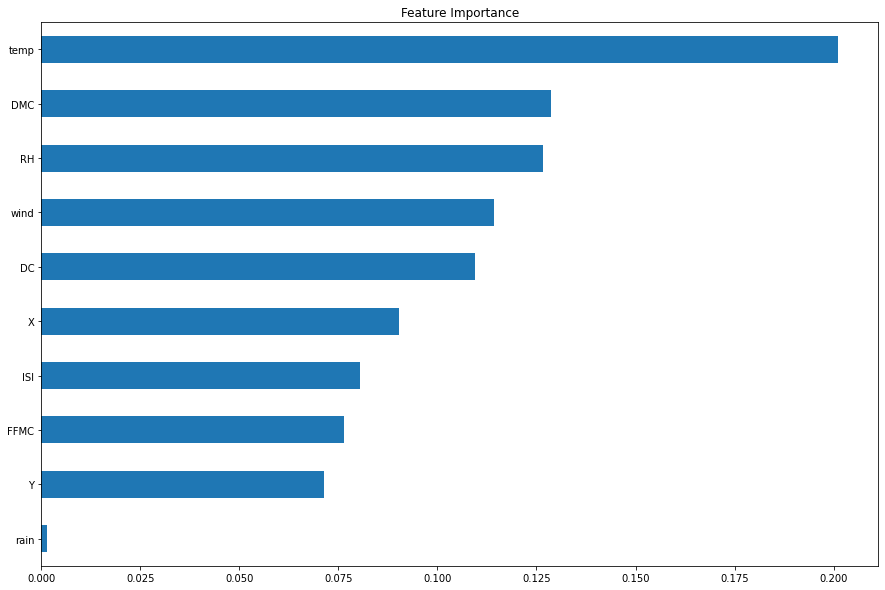

In [49]:
X_ = np.array(features)
importance_scores = random_forest.feature_importances_

plt.figure(figsize=(15, 10))
plt.title('Feature Importance')

feature_importances = pd.Series(random_forest.feature_importances_, index = X_)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')

plt.show()

### Train Test Split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(
    log_transform_forest_fire_df[features],
    log_transform_forest_fire_df[target],
    test_size = 0.13
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(449, 10)
(68, 10)
(449,)
(68,)
